In [20]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

pd.options.display.max_rows = 10

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

#To import all the modules that we need

## Step 1: Data Preparation and Exploration

### To find all the raster files that we want to merge and check out their properties

In [24]:
# File and folder paths
dirpath = r"C:\GIS Open Source\Python\RasterProcessing\Merge"

output = r"C:\GIS Open Source\Python\RasterProcessing\Merge\allentown_elevation.tif"

## Make a search criterion to select all the Lidar files
search_criteria = "4*.tif"

q = os.path.join(dirpath, search_criteria)

#The purpose is to create a search criterion that we can pass to glob
q

'C:\\GIS Open Source\\Python\\RasterProcessing\\Merge\\4*.tif'

In [25]:
all_elv = glob.glob(q)
all_elv
#This is to make sure that glob does get all the raster files that we want to merge

['C:\\GIS Open Source\\Python\\RasterProcessing\\Merge\\47002590PAS_dem.tif',
 'C:\\GIS Open Source\\Python\\RasterProcessing\\Merge\\47002600PAS_dem.tif',
 'C:\\GIS Open Source\\Python\\RasterProcessing\\Merge\\48002590PAS_dem.tif',
 'C:\\GIS Open Source\\Python\\RasterProcessing\\Merge\\48002600PAS_dem.tif']

In [52]:
#Let's see some properties of the raster files
sample = rasterio.open(all_elv[0])
sample.crs
sample.height
sample.width
#I want to see how many bands are contained
print('number of band', sample.count)
#Good, only 1 bank, making things easier

#What's the type of the data
(sample.read(1)).dtype

CRS({'proj': 'lcc', 'lat_1': 40.96666666666667, 'lat_2': 39.93333333333333, 'lat_0': 39.33333333333334, 'lon_0': -77.75, 'x_0': 600000, 'y_0': 0, 'ellps': 'GRS80', 'towgs84': '0,0,0,0,0,0,0', 'units': 'us-ft', 'no_defs': True})

3125

3125

number of band 1


dtype('float32')

Now most the preparation is done. Going to merge them into one

## Step 2: Open all the raster files 

### Essential for Merge operation

In [26]:
#Create an empty list

r_files_to_mosaic = []

#open my raster files and then put them in the empty list
for raster in all_elv:
    src = rasterio.open(raster)
    r_files_to_mosaic.append(src)
    
r_files_to_mosaic

[<open RasterReader name='C:\GIS Open Source\Python\RasterProcessing\Merge\47002590PAS_dem.tif' mode='r'>,
 <open RasterReader name='C:\GIS Open Source\Python\RasterProcessing\Merge\47002600PAS_dem.tif' mode='r'>,
 <open RasterReader name='C:\GIS Open Source\Python\RasterProcessing\Merge\48002590PAS_dem.tif' mode='r'>,
 <open RasterReader name='C:\GIS Open Source\Python\RasterProcessing\Merge\48002600PAS_dem.tif' mode='r'>]

## Step 3: Merge the open raster files

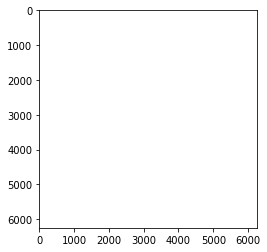

In [27]:
# Merge function returns a single mosaic array and the transformation info
result, out_trans = merge(r_files_to_mosaic)

#There have to be two variables on the left as merge generate two results

## Step 4: Examine and Save

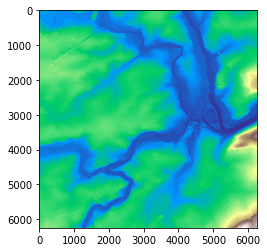

In [3]:
#Plot to see if our rsult looks fine

r2 = rasterio.open(r"C:\GIS Open Source\Python\RasterProcessing\Merge\allentown_elevation.tif")
show(r2, cmap = 'terrain')

In [36]:
#Save to our local drive

out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
                  "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                  "transform": out_trans,
                 }
                 )
with rasterio.open(output, "w", **out_meta) as dest:
       dest.write(mosaic)